In [23]:
#head files for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [26]:
#read trajectories from folder bags

nop = 39
trajectories = []
progresses = []
steps = []
scalars = []
ind = []
for i in range(nop):
    traj = []
    step = []
    progress = []
    scalar = []
    
    pose_path = "bags/user_"+str(i)+"/0_poses.txt"
    step_path = "bags/user_"+str(i)+"/0_step.txt"
    progress_path = "bags/user_"+str(i)+"/0_progress.txt"
    scalar_path = "bags/user_"+str(i)+"/0_scalar.txt"
    if not os.path.exists(pose_path) or not os.path.exists(step_path) or not os.path.exists(progress_path) or not os.path.exists(scalar_path):
        continue
    ind.append(i)
    with open(pose_path, 'r') as file:
        for line in file:
            x, y, z = map(float, line.strip().split())
            traj.append([x, y, z])
    trajectories.append(traj)

    with open(step_path, 'r') as file:
        for line in file:
            step.append(int(line.strip()))
    steps.append(step)

    with open(progress_path, 'r') as file:
        for line in file:
            progress.append(int(line.strip()))
    progresses.append(progress)

    with open(scalar_path, 'r') as file:
        for line in file:
            scalar.append(int(line.strip()))
    scalars.append(scalar)

    
print(len(trajectories))
print(len(progresses))
print(len(steps))
print(len(scalars))

22
22
22
22


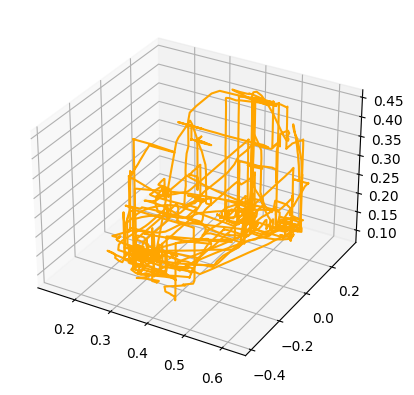

In [17]:
#plot 2d trajectories

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for traj in trajectories:
    x = [ i[0] for i in traj]
    y = [ i[1] for i in traj]
    z = [ i[2] for i in traj] 
    ax.plot(x, y, z, color = "orange")
    

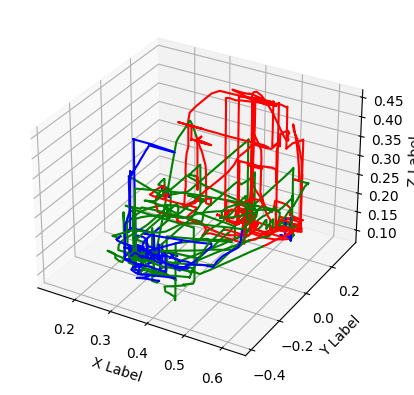

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']  # Colors for each third of the trajectory

for traj in trajectories:
    x = np.array([point[0] for point in traj])
    y = np.array([point[1] for point in traj])
    z = np.array([point[2] for point in traj])
    
    # Calculate the indices for dividing the trajectory into thirds
    num_points = len(traj)
    indices = [int(num_points/3), int(2*num_points/3)]
    
    # Plot each third with a different color
    for start, end, color in zip([0]+indices, indices+[num_points], colors):
        ax.plot(x[start:end+1], y[start:end+1], z[start:end+1], color=color)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

/tmp/ipykernel_5534/3414298211.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


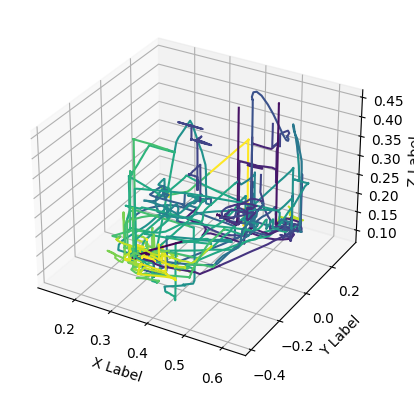

In [19]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
cmap = cm.get_cmap('viridis')
#cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue_green_red", ["deepskyblue", "blue" , "tomato", "red"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for traj in trajectories:
    x = np.array([point[0] for point in traj])
    y = np.array([point[1] for point in traj])
    z = np.array([point[2] for point in traj])
    
    step = steps[trajectories.index(traj)]
    progress = progresses[trajectories.index(traj)]
    #get accumulated step
    step = np.cumsum(step)
    #progress = np.cumsum(progress)
    #print(progress)


    #print(step)
    # Plot each segment with a different color
    for i in range(len(step)-1):
        start, end = step[i], step[i+1]
        ax.plot(x[start:end+1], y[start:end+1], z[start:end+1], color=cmap(progress[i]/100))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

/tmp/ipykernel_5534/992138940.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr')


[90, 10, 30, 30, 80, 90, 91, 94, 96, 98]
[  0 -80  20   0  50  10   1   3   2   2]
[20, 30, 30, 30, 50, 60, 60, 95, 99, 100]
[ 0 10  0  0 20 10  0 35  4  1]
[10, 100, 100, 100, 100, 70, 80, 98, 100, 100]
[  0  90   0   0   0 -30  10  18   2   0]
[30, 40, 50, 60, 75, 85, 85, 90, 80, 80]
[  0  10  10  10  15  10   0   5 -10   0]
[10, 40, 45, 50, 51, 80, 85, 86, 95, 100]
[ 0 30  5  5  1 29  5  1  9  5]
[30, 45, 50, 60, 70, 90, 90, 93, 100, 100]
[ 0 15  5 10 10 20  0  3  7  0]
[20, 40, 45, 47, 50, 60, 80, 85, 90, 100]
[ 0 20  5  2  3 10 20  5  5 10]
[30, 40, 50, 60, 70, 80, 90, 95, 60, 95]
[  0  10  10  10  10  10  10   5 -35  35]
[20, 30, 30, 40, 50, 60, 70, 75, 78, 95]
[ 0 10  0 10 10 10 10  5  3 17]
[2, 10, 10, 12, 15, 12, 15, 18, 18, 18]
[ 0  8  0  2  3 -3  3  3  0  0]
[20, 20, 20, 50, 60, 90, 92, 93, 97, 100]
[ 0  0  0 30 10 30  2  1  4  3]
[5, 25, 40, 45, 60, 75, 75, 85, 100, 100]
[ 0 20 15  5 15 15  0 10 15  0]
[30, 35, 38, 45, 60, 75, 80, 90, 95, 100]
[ 0  5  3  7 15 15  5 10  5  5

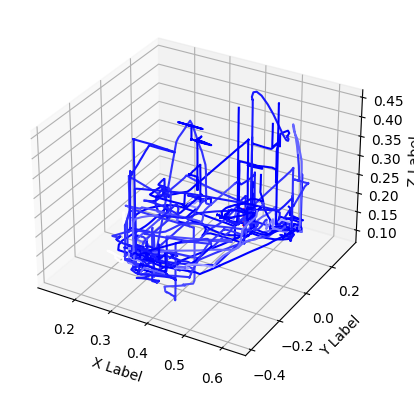

In [20]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
cmap = cm.get_cmap('bwr')
#cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue_green_red", ["deepskyblue", "blue" , "tomato", "red"])


def rescale(x, min_x, range_x):
    return (x - min_x) / range_x
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for traj in trajectories:
    x = np.array([point[0] for point in traj])
    y = np.array([point[1] for point in traj])
    z = np.array([point[2] for point in traj])
    
    step = steps[trajectories.index(traj)]
    progress = progresses[trajectories.index(traj)]
    #get accumulated step
    step = np.cumsum(step)
        # Calculate and rescale delta progress
    delta_progress = np.diff(progress, prepend=progress[0])
    #rescaled_delta_progress = [rescale(delta, min_delta, delta_range) for delta in delta_progress]

    print(progress)
    print(delta_progress)
    #progress = np.cumsum(progress)
    #print(progress)


    #print(step)
    # Plot each segment with a different color
    for i in range(len(step)-1):
        start, end = step[i], step[i+1]
        ax.plot(x[start:end+1], y[start:end+1], z[start:end+1], color=cmap(delta_progress[i]/100))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

[[90, 10, 30, 30, 80, 90, 91, 94, 96, 98], [20, 30, 30, 30, 50, 60, 60, 95, 99, 100], [10, 100, 100, 100, 100, 70, 80, 98, 100, 100], [30, 40, 50, 60, 75, 85, 85, 90, 80, 80], [10, 40, 45, 50, 51, 80, 85, 86, 95, 100], [30, 45, 50, 60, 70, 90, 90, 93, 100, 100], [20, 40, 45, 47, 50, 60, 80, 85, 90, 100], [30, 40, 50, 60, 70, 80, 90, 95, 60, 95], [20, 30, 30, 40, 50, 60, 70, 75, 78, 95], [2, 10, 10, 12, 15, 12, 15, 18, 18, 18], [20, 20, 20, 50, 60, 90, 92, 93, 97, 100], [5, 25, 40, 45, 60, 75, 75, 85, 100, 100], [30, 35, 38, 45, 60, 75, 80, 90, 95, 100], [10, 15, 30, 35, 50, 60, 65, 70, 80, 100], [20, 25, 30, 50, 60, 80, 90, 95, 98, 100], [20, 40, 60, 80, 90, 95, 98, 99, 100, 100], [25, 25, 15, 10, 5, 0, 0, 0, 0, 0], [10, 25, 50, 60, 70, 75, 85, 90, 90, 90], [20, 40, 50, 55, 60, 70, 75, 85, 95, 100], [5, 40, 45, 50, 70, 75, 75, 85, 100, 100], [40, 50, 60, 70, 90, 95, 95, 95, 96, 90], [17, 29, 25, 20, 15, 38, 70, 90, 93, 100]]
23


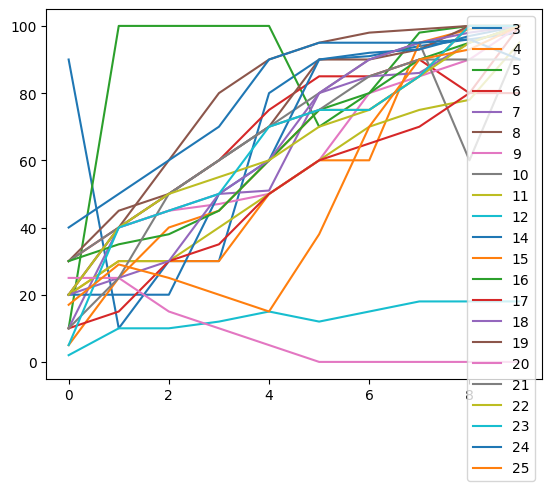

In [21]:
print(progresses)
plt.plot(np.array(progresses).T)
plt.legend(ind)
print(ind[19])